In [1]:
from nilearn import datasets
from nilearn.image import resample_to_img

# 加载Harvard-Oxford图谱
atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
# 提取precuneus区域（需要查看标签对应）

[fetch_atlas_harvard_oxford] Dataset found in /home/andlab03/nilearn_data/fsl


In [4]:
from nilearn import datasets
from nilearn.image import resample_to_img
import nibabel as nib
import numpy as np
import os

# 创建mask文件夹（如果不存在）
os.makedirs('./mask', exist_ok=True)

# 1. 加载Harvard-Oxford图谱
atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

# 2. 查看图谱信息
print("图谱标签：")
for i, label in enumerate(atlas['labels']):
    print(f"{i}: {label}")

# 3. 直接使用atlas['maps']，它已经是Nifti1Image对象
atlas_img = atlas['maps']
atlas_data = atlas_img.get_fdata()

# 4. 找到precuneus对应的索引
# 在Harvard-Oxford图谱中，Precuneus通常是索引15
precuneus_idx = 15  # 根据上面打印的标签确认

# 5. 创建precuneus的mask
precuneus_mask = (atlas_data == precuneus_idx).astype(int)

# 6. 保存mask为NIfTI文件（.nii格式）
precuneus_mask_img = nib.Nifti1Image(precuneus_mask, atlas_img.affine, atlas_img.header)
nib.save(precuneus_mask_img, './mask/precuneus_mask.nii')

print(f"Precuneus mask已保存到 ./mask/precuneus_mask.nii，包含 {int(precuneus_mask.sum())} 个体素")

# 7. 如果需要重采样到你自己数据的空间
# your_func_img = nib.load('your_functional_data.nii.gz')
# precuneus_mask_resampled = resample_to_img(precuneus_mask_img, your_func_img, interpolation='nearest')
# nib.save(precuneus_mask_resampled, './mask/precuneus_mask_resampled.nii')

[fetch_atlas_harvard_oxford] Dataset found in /home/andlab03/nilearn_data/fsl
图谱标签：
0: Background
1: Frontal Pole
2: Insular Cortex
3: Superior Frontal Gyrus
4: Middle Frontal Gyrus
5: Inferior Frontal Gyrus, pars triangularis
6: Inferior Frontal Gyrus, pars opercularis
7: Precentral Gyrus
8: Temporal Pole
9: Superior Temporal Gyrus, anterior division
10: Superior Temporal Gyrus, posterior division
11: Middle Temporal Gyrus, anterior division
12: Middle Temporal Gyrus, posterior division
13: Middle Temporal Gyrus, temporooccipital part
14: Inferior Temporal Gyrus, anterior division
15: Inferior Temporal Gyrus, posterior division
16: Inferior Temporal Gyrus, temporooccipital part
17: Postcentral Gyrus
18: Superior Parietal Lobule
19: Supramarginal Gyrus, anterior division
20: Supramarginal Gyrus, posterior division
21: Angular Gyrus
22: Lateral Occipital Cortex, superior division
23: Lateral Occipital Cortex, inferior division
24: Intracalcarine Cortex
25: Frontal Medial Cortex
26: Juxt

In [1]:
from nilearn import datasets
from nilearn.image import resample_to_img
import nibabel as nib
import numpy as np
import os

# 创建mask文件夹（如果不存在）
os.makedirs('./mask', exist_ok=True)

# 1. 加载Harvard-Oxford皮层图谱
atlas_cort = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

# 2. 加载Harvard-Oxford皮层下结构图谱（包含杏仁核）
atlas_sub = datasets.fetch_atlas_harvard_oxford('sub-maxprob-thr25-2mm')

# 3. 查看皮层图谱标签（用于ACC）
print("皮层图谱标签：")
for i, label in enumerate(atlas_cort['labels']):
    print(f"{i}: {label}")

print("\n" + "="*50 + "\n")

# 4. 查看皮层下图谱标签（用于Amygdala）
print("皮层下图谱标签：")
for i, label in enumerate(atlas_sub['labels']):
    print(f"{i}: {label}")

# 5. 创建ACC mask
# ACC (Anterior Cingulate Cortex) 在Harvard-Oxford图谱中通常包含：
# - Cingulate Gyrus, anterior division (索引可能是10或11)
# 请根据上面打印的标签确认具体索引
atlas_cort_img = atlas_cort['maps']
atlas_cort_data = atlas_cort_img.get_fdata()

# 查找包含"Cingulate"和"anterior"的标签
acc_indices = []
for i, label in enumerate(atlas_cort['labels']):
    if 'cingulate' in label.lower() and 'anterior' in label.lower():
        print(f"\nACC相关区域: {i}: {label}")
        acc_indices.append(i)

# 创建ACC mask（合并所有anterior cingulate相关区域）
acc_mask = np.zeros_like(atlas_cort_data)
for idx in acc_indices:
    acc_mask += (atlas_cort_data == idx).astype(int)
acc_mask = (acc_mask > 0).astype(int)

# 保存ACC mask
acc_mask_img = nib.Nifti1Image(acc_mask, atlas_cort_img.affine, atlas_cort_img.header)
nib.save(acc_mask_img, './mask/ACC_mask.nii')
print(f"\nACC mask已保存到 ./mask/ACC_mask.nii，包含 {int(acc_mask.sum())} 个体素")

# 6. 创建Amygdala mask
atlas_sub_img = atlas_sub['maps']
atlas_sub_data = atlas_sub_img.get_fdata()

# 查找杏仁核（左右两侧）
amygdala_indices = []
for i, label in enumerate(atlas_sub['labels']):
    if 'amygdala' in label.lower():
        print(f"\nAmygdala相关区域: {i}: {label}")
        amygdala_indices.append(i)

# 创建Amygdala mask（包含左右两侧）
amygdala_mask = np.zeros_like(atlas_sub_data)
for idx in amygdala_indices:
    amygdala_mask += (atlas_sub_data == idx).astype(int)
amygdala_mask = (amygdala_mask > 0).astype(int)

# 保存Amygdala mask
amygdala_mask_img = nib.Nifti1Image(amygdala_mask, atlas_sub_img.affine, atlas_sub_img.header)
nib.save(amygdala_mask_img, './mask/Amygdala_mask.nii')
print(f"\nAmygdala mask已保存到 ./mask/Amygdala_mask.nii，包含 {int(amygdala_mask.sum())} 个体素")

# 7. 如果需要分别保存左右侧的mask，可以这样做：
# 左侧杏仁核
left_amygdala_idx = [i for i, label in enumerate(atlas_sub['labels']) if 'left' in label.lower() and 'amygdala' in label.lower()]
if left_amygdala_idx:
    left_amygdala_mask = (atlas_sub_data == left_amygdala_idx[0]).astype(int)
    left_amygdala_mask_img = nib.Nifti1Image(left_amygdala_mask, atlas_sub_img.affine, atlas_sub_img.header)
    nib.save(left_amygdala_mask_img, './mask/Left_Amygdala_mask.nii')
    print(f"左侧Amygdala mask已保存，包含 {int(left_amygdala_mask.sum())} 个体素")

# 右侧杏仁核
right_amygdala_idx = [i for i, label in enumerate(atlas_sub['labels']) if 'right' in label.lower() and 'amygdala' in label.lower()]
if right_amygdala_idx:
    right_amygdala_mask = (atlas_sub_data == right_amygdala_idx[0]).astype(int)
    right_amygdala_mask_img = nib.Nifti1Image(right_amygdala_mask, atlas_sub_img.affine, atlas_sub_img.header)
    nib.save(right_amygdala_mask_img, './mask/Right_Amygdala_mask.nii')
    print(f"右侧Amygdala mask已保存，包含 {int(right_amygdala_mask.sum())} 个体素")

print("\n所有mask文件已生成完成！")

[fetch_atlas_harvard_oxford] Dataset found in /home/andlab03/nilearn_data/fsl
[fetch_atlas_harvard_oxford] Dataset found in /home/andlab03/nilearn_data/fsl
皮层图谱标签：
0: Background
1: Frontal Pole
2: Insular Cortex
3: Superior Frontal Gyrus
4: Middle Frontal Gyrus
5: Inferior Frontal Gyrus, pars triangularis
6: Inferior Frontal Gyrus, pars opercularis
7: Precentral Gyrus
8: Temporal Pole
9: Superior Temporal Gyrus, anterior division
10: Superior Temporal Gyrus, posterior division
11: Middle Temporal Gyrus, anterior division
12: Middle Temporal Gyrus, posterior division
13: Middle Temporal Gyrus, temporooccipital part
14: Inferior Temporal Gyrus, anterior division
15: Inferior Temporal Gyrus, posterior division
16: Inferior Temporal Gyrus, temporooccipital part
17: Postcentral Gyrus
18: Superior Parietal Lobule
19: Supramarginal Gyrus, anterior division
20: Supramarginal Gyrus, posterior division
21: Angular Gyrus
22: Lateral Occipital Cortex, superior division
23: Lateral Occipital Cortex

In [4]:
from nilearn import datasets
from nilearn.image import resample_to_img
import nibabel as nib
import numpy as np
import os

# 创建mask文件夹（如果不存在）
os.makedirs('./mask', exist_ok=True)

# 1. 加载Harvard-Oxford图谱（皮层和皮层下）
atlas_cort = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_sub = datasets.fetch_atlas_harvard_oxford('sub-maxprob-thr25-2mm')

# 2. 查看皮层图谱标签
print("皮层图谱标签：")
for i, label in enumerate(atlas_cort['labels']):
    print(f"{i}: {label}")

print("\n皮层下图谱标签：")
for i, label in enumerate(atlas_sub['labels']):
    print(f"{i}: {label}")

# 3. 获取图谱数据
atlas_cort_img = atlas_cort['maps']
atlas_cort_data = atlas_cort_img.get_fdata()

# 4. 创建MTG mask
# 在Harvard-Oxford图谱中，Middle Temporal Gyrus通常包含左右两侧
# 需要根据打印的标签找到对应的索引
mtg_left_idx = None
mtg_right_idx = None

for i, label in enumerate(atlas_cort['labels']):
    if 'Middle Temporal Gyrus' in label and 'anterior' not in label and 'posterior' not in label:
        if 'posterior' in label.lower():
            continue
        mtg_left_idx = i if mtg_left_idx is None else mtg_left_idx
        mtg_right_idx = i if mtg_left_idx != i else mtg_right_idx

# 如果找不到，手动指定（Harvard-Oxford中MTG的常见索引）
if mtg_left_idx is None:
    # 通常anterior和posterior MTG的索引
    mtg_indices = []
    for i, label in enumerate(atlas_cort['labels']):
        if 'Middle Temporal Gyrus' in label:
            mtg_indices.append(i)
            print(f"找到MTG: {i} - {label}")
    
    # 合并所有MTG区域
    mtg_mask = np.zeros_like(atlas_cort_data)
    for idx in mtg_indices:
        mtg_mask += (atlas_cort_data == idx).astype(int)
    mtg_mask = (mtg_mask > 0).astype(int)
else:
    mtg_mask = ((atlas_cort_data == mtg_left_idx) | (atlas_cort_data == mtg_right_idx)).astype(int)

# 保存MTG mask
mtg_mask_img = nib.Nifti1Image(mtg_mask, atlas_cort_img.affine, atlas_cort_img.header)
nib.save(mtg_mask_img, './mask/mtg_mask.nii')
print(f"\nMTG mask已保存到 ./mask/mtg_mask.nii，包含 {int(mtg_mask.sum())} 个体素")

# 5. 创建mPFC mask
# mPFC (medial prefrontal cortex) 通常包括：
# - Frontal Medial Cortex
# - Paracingulate Gyrus
# - Anterior Cingulate Gyrus
mpfc_keywords = ['Frontal Medial', 'Paracingulate', 'Cingulate Gyrus, anterior']

mpfc_indices = []
for i, label in enumerate(atlas_cort['labels']):
    for keyword in mpfc_keywords:
        if keyword in label:
            mpfc_indices.append(i)
            print(f"找到mPFC相关区域: {i} - {label}")
            break

# 合并所有mPFC相关区域
mpfc_mask = np.zeros_like(atlas_cort_data)
for idx in mpfc_indices:
    mpfc_mask += (atlas_cort_data == idx).astype(int)
mpfc_mask = (mpfc_mask > 0).astype(int)

# 保存mPFC mask
mpfc_mask_img = nib.Nifti1Image(mpfc_mask, atlas_cort_img.affine, atlas_cort_img.header)
nib.save(mpfc_mask_img, './mask/mpfc_mask.nii')
print(f"mPFC mask已保存到 ./mask/mpfc_mask.nii，包含 {int(mpfc_mask.sum())} 个体素")

# 6. 也生成Precuneus mask
precuneus_idx = None
for i, label in enumerate(atlas_cort['labels']):
    if 'Precuneous' in label or 'Precuneus' in label:
        precuneus_idx = i
        print(f"找到Precuneus: {i} - {label}")
        break

if precuneus_idx is not None:
    precuneus_mask = (atlas_cort_data == precuneus_idx).astype(int)
    precuneus_mask_img = nib.Nifti1Image(precuneus_mask, atlas_cort_img.affine, atlas_cort_img.header)
    nib.save(precuneus_mask_img, './mask/precuneus_mask.nii')
    print(f"Precuneus mask已保存到 ./mask/precuneus_mask.nii，包含 {int(precuneus_mask.sum())} 个体素")

print("\n所有mask文件已生成完成！")

# 7. 如果需要重采样到你自己数据的空间
# your_func_img = nib.load('your_functional_data.nii.gz')
# mtg_mask_resampled = resample_to_img(mtg_mask_img, your_func_img, interpolation='nearest')
# nib.save(mtg_mask_resampled, './mask/mtg_mask_resampled.nii')
# mpfc_mask_resampled = resample_to_img(mpfc_mask_img, your_func_img, interpolation='nearest')
# nib.save(mpfc_mask_resampled, './mask/mpfc_mask_resampled.nii')

[fetch_atlas_harvard_oxford] Dataset found in /home/andlab03/nilearn_data/fsl
[fetch_atlas_harvard_oxford] Dataset found in /home/andlab03/nilearn_data/fsl
皮层图谱标签：
0: Background
1: Frontal Pole
2: Insular Cortex
3: Superior Frontal Gyrus
4: Middle Frontal Gyrus
5: Inferior Frontal Gyrus, pars triangularis
6: Inferior Frontal Gyrus, pars opercularis
7: Precentral Gyrus
8: Temporal Pole
9: Superior Temporal Gyrus, anterior division
10: Superior Temporal Gyrus, posterior division
11: Middle Temporal Gyrus, anterior division
12: Middle Temporal Gyrus, posterior division
13: Middle Temporal Gyrus, temporooccipital part
14: Inferior Temporal Gyrus, anterior division
15: Inferior Temporal Gyrus, posterior division
16: Inferior Temporal Gyrus, temporooccipital part
17: Postcentral Gyrus
18: Superior Parietal Lobule
19: Supramarginal Gyrus, anterior division
20: Supramarginal Gyrus, posterior division
21: Angular Gyrus
22: Lateral Occipital Cortex, superior division
23: Lateral Occipital Cortex

正在下载MNI152标准脑模板...
正在加载mask文件...
正在处理mask数据...
正在生成 lTPJ 玻璃脑视图...


/tmp/ipykernel_3604370/676479236.py:21: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  mask1_resampled = resample_to_img(mask1_img, mni_template, interpolation='nearest')
/tmp/ipykernel_3604370/676479236.py:21: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  mask1_resampled = resample_to_img(mask1_img, mni_template, interpolation='nearest')
/tmp/ipykernel_3604370/676479236.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  mask2_resampled = resample_to_img(mask2_img, mni_template, interpolation='nearest')
/tmp/ipykernel_3604370/676479236.py:22: FutureWarning: From release 0.13.0 onwards, this 

lTPJ 玻璃脑图像已保存为 'lTPJ_glass_brain.png'


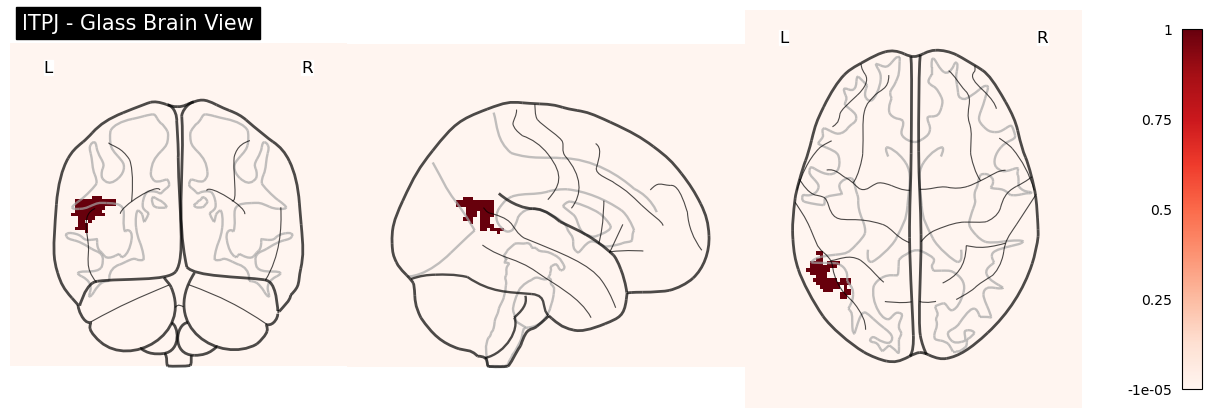

正在生成 Precuneus 玻璃脑视图...
Precuneus 玻璃脑图像已保存为 'precuneus_glass_brain.png'


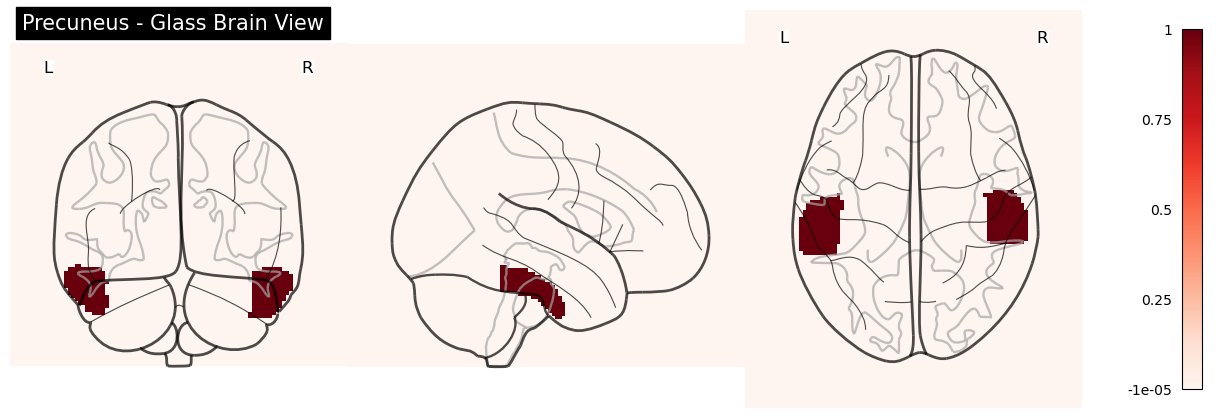


lTPJ voxels: 209
Precuneus voxels: 1942

所有可视化完成！


In [3]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets, plotting
from nilearn.image import resample_to_img

# 下载MNI152标准脑模板作为背景
print("正在下载MNI152标准脑模板...")
mni_template = datasets.load_mni152_template(resolution=2)

# 加载mask文件
mask1_path = './mask/2_lTPJ.nii'
mask2_path = './mask/precuneus_mask.nii'

print("正在加载mask文件...")
mask1_img = nib.load(mask1_path)
mask2_img = nib.load(mask2_path)

# 将mask重采样到MNI空间
print("正在处理mask数据...")
mask1_resampled = resample_to_img(mask1_img, mni_template, interpolation='nearest')
mask2_resampled = resample_to_img(mask2_img, mni_template, interpolation='nearest')

# ===== 3D玻璃脑视图 - lTPJ (白色背景) =====
print("正在生成 lTPJ 玻璃脑视图...")
fig1 = plt.figure(figsize=(12, 4), facecolor='white')

display1 = plotting.plot_glass_brain(
    mask1_resampled,
    colorbar=True,
    cmap='Reds',
    title='lTPJ - Glass Brain View',
    figure=fig1,
    plot_abs=False,
    black_bg=False  # 设置为白色背景
)

plt.savefig('lTPJ_glass_brain.png', dpi=300, facecolor='white', bbox_inches='tight', transparent=True)
print("lTPJ 玻璃脑图像已保存为 'lTPJ_glass_brain.png'")
plt.show()

# ===== 3D玻璃脑视图 - Precuneus (白色背景) =====
print("正在生成 Precuneus 玻璃脑视图...")
fig2 = plt.figure(figsize=(12, 4), facecolor='white')

display2 = plotting.plot_glass_brain(
    mask2_resampled,
    colorbar=True,
    cmap='Reds',
    title='Precuneus - Glass Brain View',
    figure=fig2,
    plot_abs=False,
    black_bg=False  # 设置为白色背景
)

plt.savefig('precuneus_glass_brain.png', dpi=300, facecolor='white', bbox_inches='tight', transparent=True)
print("Precuneus 玻璃脑图像已保存为 'precuneus_glass_brain.png'")
plt.show()

# 打印信息
mask1_data = mask1_resampled.get_fdata()
mask2_data = mask2_resampled.get_fdata()
print(f"\nlTPJ voxels: {np.sum(mask1_data > 0)}")
print(f"Precuneus voxels: {np.sum(mask2_data > 0)}")
print("\n所有可视化完成！")

正在下载MNI152标准脑模板...
正在加载mask文件...
正在处理mask数据...
正在生成 ACC 玻璃脑视图...


/tmp/ipykernel_3604370/91153433.py:21: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  mask1_resampled = resample_to_img(mask1_img, mni_template, interpolation='nearest')
/tmp/ipykernel_3604370/91153433.py:21: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  mask1_resampled = resample_to_img(mask1_img, mni_template, interpolation='nearest')
/tmp/ipykernel_3604370/91153433.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  mask2_resampled = resample_to_img(mask2_img, mni_template, interpolation='nearest')
/tmp/ipykernel_3604370/91153433.py:22: FutureWarning: From release 0.13.0 onwards, this func

ACC 玻璃脑图像已保存为 'ACC_glass_brain.png'


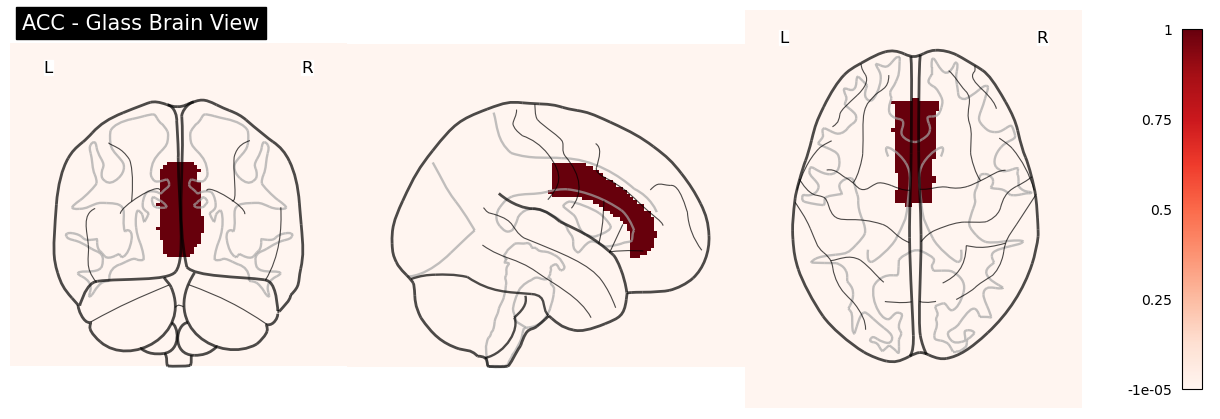

正在生成 Amygdala 玻璃脑视图...
Amygdala 玻璃脑图像已保存为 'Amygdala_glass_brain.png'


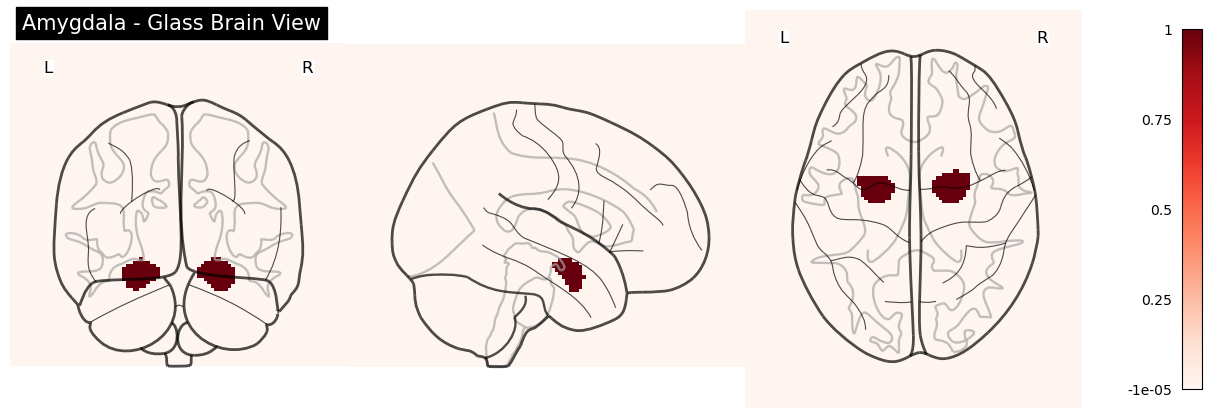


ACC voxels: 2592
Amygdala voxels: 672

所有可视化完成！


In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets, plotting
from nilearn.image import resample_to_img

# 下载MNI152标准脑模板作为背景
print("正在下载MNI152标准脑模板...")
mni_template = datasets.load_mni152_template(resolution=2)

# 加载mask文件
mask1_path = './mask/ACC_mask.nii'
mask2_path = './mask/Amygdala_mask.nii'

print("正在加载mask文件...")
mask1_img = nib.load(mask1_path)
mask2_img = nib.load(mask2_path)

# 将mask重采样到MNI空间
print("正在处理mask数据...")
mask1_resampled = resample_to_img(mask1_img, mni_template, interpolation='nearest')
mask2_resampled = resample_to_img(mask2_img, mni_template, interpolation='nearest')

# ===== 3D玻璃脑视图 - ACC (白色背景) =====
print("正在生成 ACC 玻璃脑视图...")
fig1 = plt.figure(figsize=(12, 4), facecolor='white')

display1 = plotting.plot_glass_brain(
    mask1_resampled,
    colorbar=True,
    cmap='Reds',
    title='ACC - Glass Brain View',
    figure=fig1,
    plot_abs=False,
    black_bg=False  # 设置为白色背景
)

plt.savefig('ACC_glass_brain.png', dpi=300, facecolor='white', bbox_inches='tight', transparent=True)
print("ACC 玻璃脑图像已保存为 'ACC_glass_brain.png'")
plt.show()

# ===== 3D玻璃脑视图 - Amygdala (白色背景) =====
print("正在生成 Amygdala 玻璃脑视图...")
fig2 = plt.figure(figsize=(12, 4), facecolor='white')

display2 = plotting.plot_glass_brain(
    mask2_resampled,
    colorbar=True,
    cmap='Reds',
    title='Amygdala - Glass Brain View',
    figure=fig2,
    plot_abs=False,
    black_bg=False  # 设置为白色背景
)

plt.savefig('Amygdala_glass_brain.png', dpi=300, facecolor='white', bbox_inches='tight', transparent=True)
print("Amygdala 玻璃脑图像已保存为 'Amygdala_glass_brain.png'")
plt.show()

# 打印信息
mask1_data = mask1_resampled.get_fdata()
mask2_data = mask2_resampled.get_fdata()
print(f"\nACC voxels: {np.sum(mask1_data > 0)}")
print(f"Amygdala voxels: {np.sum(mask2_data > 0)}")
print("\n所有可视化完成！")

正在下载MNI152标准脑模板...
正在加载mask文件...
正在处理mask数据...
正在生成 mPFC 玻璃脑视图...


/tmp/ipykernel_3604370/2500713111.py:21: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  mask1_resampled = resample_to_img(mask1_img, mni_template, interpolation='nearest')
/tmp/ipykernel_3604370/2500713111.py:21: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  mask1_resampled = resample_to_img(mask1_img, mni_template, interpolation='nearest')
/tmp/ipykernel_3604370/2500713111.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  mask2_resampled = resample_to_img(mask2_img, mni_template, interpolation='nearest')
/tmp/ipykernel_3604370/2500713111.py:22: FutureWarning: From release 0.13.0 onwards, t

mPFC 玻璃脑图像已保存为 'mpfc_glass_brain.png'


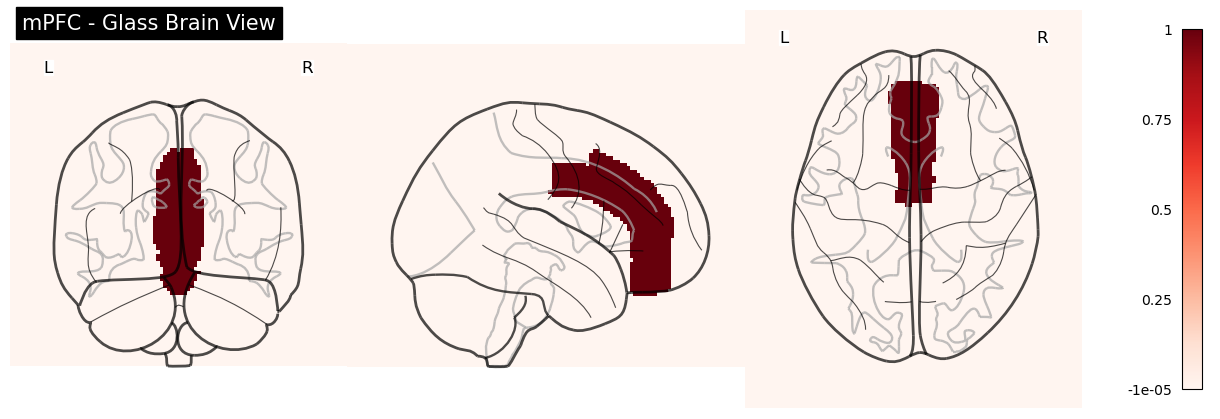

正在生成 MTG 玻璃脑视图...
MTG 玻璃脑图像已保存为 'mtg_glass_brain.png'


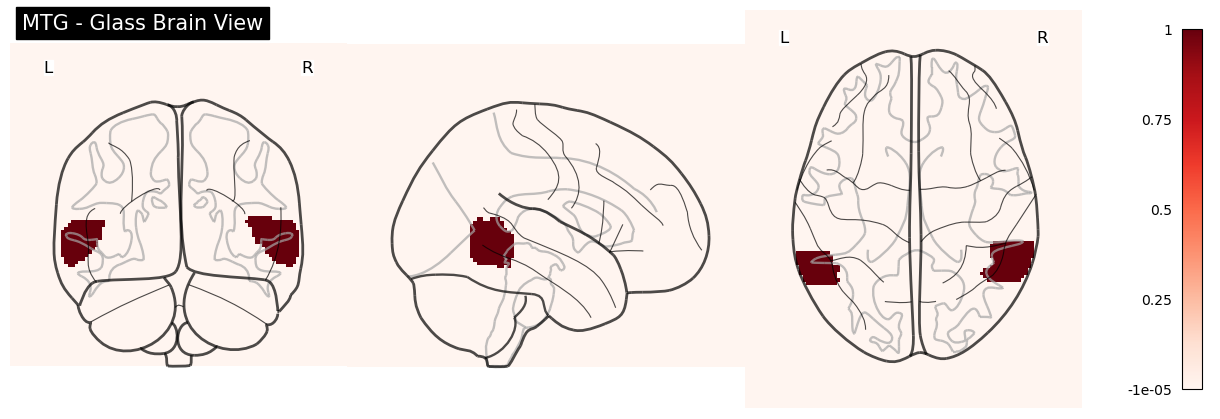


mPFC voxels: 6512
MTG voxels: 2004

所有可视化完成！


In [5]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets, plotting
from nilearn.image import resample_to_img

# 下载MNI152标准脑模板作为背景
print("正在下载MNI152标准脑模板...")
mni_template = datasets.load_mni152_template(resolution=2)

# 加载mask文件
mask1_path = './mask/mpfc_mask.nii'
mask2_path = './mask/mtg_mask.nii'

print("正在加载mask文件...")
mask1_img = nib.load(mask1_path)
mask2_img = nib.load(mask2_path)

# 将mask重采样到MNI空间
print("正在处理mask数据...")
mask1_resampled = resample_to_img(mask1_img, mni_template, interpolation='nearest')
mask2_resampled = resample_to_img(mask2_img, mni_template, interpolation='nearest')

# ===== 3D玻璃脑视图 - mPFC (白色背景) =====
print("正在生成 mPFC 玻璃脑视图...")
fig1 = plt.figure(figsize=(12, 4), facecolor='white')

display1 = plotting.plot_glass_brain(
    mask1_resampled,
    colorbar=True,
    cmap='Reds',
    title='mPFC - Glass Brain View',
    figure=fig1,
    plot_abs=False,
    black_bg=False  # 设置为白色背景
)

plt.savefig('mpfc_glass_brain.png', dpi=300, facecolor='white', bbox_inches='tight', transparent=True)
print("mPFC 玻璃脑图像已保存为 'mpfc_glass_brain.png'")
plt.show()

# ===== 3D玻璃脑视图 - MTG (白色背景) =====
print("正在生成 MTG 玻璃脑视图...")
fig2 = plt.figure(figsize=(12, 4), facecolor='white')

display2 = plotting.plot_glass_brain(
    mask2_resampled,
    colorbar=True,
    cmap='Reds',
    title='MTG - Glass Brain View',
    figure=fig2,
    plot_abs=False,
    black_bg=False  # 设置为白色背景
)

plt.savefig('mtg_glass_brain.png', dpi=300, facecolor='white', bbox_inches='tight', transparent=True)
print("MTG 玻璃脑图像已保存为 'mtg_glass_brain.png'")
plt.show()

# 打印信息
mask1_data = mask1_resampled.get_fdata()
mask2_data = mask2_resampled.get_fdata()
print(f"\nmPFC voxels: {np.sum(mask1_data > 0)}")
print(f"MTG voxels: {np.sum(mask2_data > 0)}")
print("\n所有可视化完成！")

Found 6 Excel files:
  - 7-1.xlsx
  - 7-2_2nd_3rd_LTPJ_cat2_value.xlsx
  - 7-3_2nd_3rd_precu_PCC_cat2_value.xlsx
  - ~$7-1.xlsx
  - ~$7-2_2nd_3rd_LTPJ_cat2_value.xlsx
  - ~$7-3_2nd_3rd_precu_PCC_cat2_value.xlsx

Processing file: 7-1.xlsx
Columns: ['Group_ID', 'Immediate-Delayed-value in precuneus']

Data preview:
  Group_ID  Immediate-Delayed-value in precuneus
0      SPP                             68.328946
1      SPP                            177.071106
2      SPP                             54.902439
3      SPP                            144.856756
4      SPP                             68.301799

Data shape: (56, 2)

Group statistics:
Group_ID
TPP    30
SPP    26
Name: count, dtype: int64

Groups: ['SPP', 'TPP']

Descriptive statistics:

SPP group:
  Sample size: 26
  Mean: 93.1959
  Std: 57.6553
  Median: 68.3154
  Min: 33.9592
  Max: 228.1317

TPP group:
  Sample size: 30
  Mean: 63.4367
  Std: 28.7891
  Median: 55.1517
  Min: 20.8851
  Max: 137.3392

Normality test (Shapiro-Wi

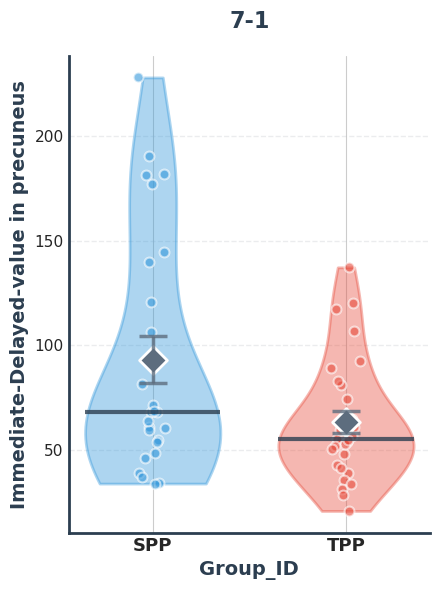


Processing file: 7-2_2nd_3rd_LTPJ_cat2_value.xlsx
Columns: ['Group_ID', '2nd_3rd_LTPJ_cat2_value']

Data preview:
   Group_ID  2nd_3rd_LTPJ_cat2_value
0         2                 0.361366
1         2                -0.100193
2         2                 2.830890
3         2                 0.840782
4         2                -0.010911

Data shape: (56, 2)

Group statistics:
Group_ID
3    30
2    26
Name: count, dtype: int64

Groups: [np.int64(2), np.int64(3)]

Descriptive statistics:

2 group:
  Sample size: 26
  Mean: 0.8314
  Std: 0.7057
  Median: 0.6921
  Min: -0.1002
  Max: 2.8309

3 group:
  Sample size: 30
  Mean: 0.4030
  Std: 0.8508
  Median: 0.3006
  Min: -1.0848
  Max: 1.9003

Normality test (Shapiro-Wilk):
  2 group: W=0.9171, p=0.0385
  3 group: W=0.9686, p=0.5004

Homogeneity of variance test (Levene):
  F=2.3702, p=0.1295

Independent samples t-test:
  t=2.0316, p=0.0471

Mann-Whitney U test (non-parametric):
  U=504.0000, p=0.0622

Cohen's d (effect size): 0.5443

Figure

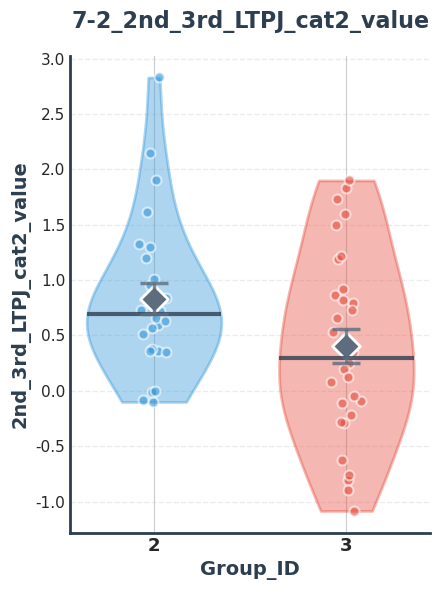


Processing file: 7-3_2nd_3rd_precu_PCC_cat2_value.xlsx
Columns: ['Group_ID', '2nd_3rd_precu_PCC_cat2_value']

Data preview:
   Group_ID  2nd_3rd_precu_PCC_cat2_value
0         2                      0.382061
1         2                      0.004129
2         2                      0.465075
3         2                      0.458917
4         2                      0.375942

Data shape: (56, 2)

Group statistics:
Group_ID
3    30
2    26
Name: count, dtype: int64

Groups: [np.int64(2), np.int64(3)]

Descriptive statistics:

2 group:
  Sample size: 26
  Mean: 0.3492
  Std: 0.3414
  Median: 0.3665
  Min: -0.4566
  Max: 1.0715

3 group:
  Sample size: 30
  Mean: 0.0305
  Std: 0.5506
  Median: 0.0138
  Min: -0.7881
  Max: 2.0573

Normality test (Shapiro-Wilk):
  2 group: W=0.9720, p=0.6745
  3 group: W=0.8560, p=0.0008

Homogeneity of variance test (Levene):
  F=2.4753, p=0.1215

Independent samples t-test:
  t=2.5549, p=0.0135

Mann-Whitney U test (non-parametric):
  U=583.0000, p=0.0016


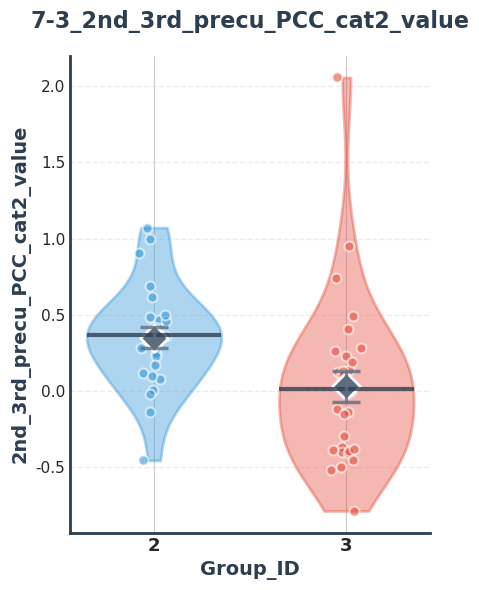


Processing file: ~$7-1.xlsx
Error reading file: File is not a zip file
Trying with default engine...
Still unable to read file: Excel file format cannot be determined, you must specify an engine manually.

Processing file: ~$7-2_2nd_3rd_LTPJ_cat2_value.xlsx
Error reading file: File is not a zip file
Trying with default engine...
Still unable to read file: Excel file format cannot be determined, you must specify an engine manually.

Processing file: ~$7-3_2nd_3rd_precu_PCC_cat2_value.xlsx
Error reading file: File is not a zip file
Trying with default engine...
Still unable to read file: Excel file format cannot be determined, you must specify an engine manually.

All files processed!
Figures saved in: /home/andlab03/nas_data/law_llm/output_figures


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import os
from pathlib import Path

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11

# Set file path
data_dir = Path('./jiamin/fMRI_data/ROI/ROI/7-1')

# Check if directory exists
if not data_dir.exists():
    print(f"Error: Directory does not exist - {data_dir.absolute()}")
    print("Please check if the path is correct")
    exit()

# Get all xlsx and xls files
xlsx_files = list(data_dir.glob('*.xlsx')) + list(data_dir.glob('*.xls'))

if len(xlsx_files) == 0:
    print(f"Warning: No Excel files found in {data_dir.absolute()}")
    print("All files in directory:")
    for f in data_dir.iterdir():
        print(f"  - {f.name}")
    exit()

print(f"Found {len(xlsx_files)} Excel files:")
for f in xlsx_files:
    print(f"  - {f.name}")

# Create output directory
output_dir = Path('./output_figures')
output_dir.mkdir(exist_ok=True)

# Process each file
for file_path in xlsx_files:
    print(f"\n{'='*60}")
    print(f"Processing file: {file_path.name}")
    print(f"{'='*60}")
    
    try:
        # Try to read data with specified engine
        if file_path.suffix.lower() == '.xlsx':
            df = pd.read_excel(file_path, engine='openpyxl')
        elif file_path.suffix.lower() == '.xls':
            df = pd.read_excel(file_path, engine='xlrd')
        else:
            print(f"Skipping unknown format: {file_path.name}")
            continue
            
    except Exception as e:
        print(f"Error reading file: {e}")
        print(f"Trying with default engine...")
        try:
            df = pd.read_excel(file_path)
        except Exception as e2:
            print(f"Still unable to read file: {e2}")
            continue
    
    # Get column names
    columns = df.columns.tolist()
    print(f"Columns: {columns}")
    
    # Check data
    if len(columns) < 2:
        print(f"Warning: Less than 2 columns, skipping this file")
        continue
    
    # Assume first column is grouping, second column is data
    group_col = columns[0]
    data_col = columns[1]
    
    # Remove missing values
    df = df.dropna(subset=[group_col, data_col])
    
    if len(df) == 0:
        print(f"Warning: No data after removing missing values, skipping this file")
        continue
    
    # Display basic data information
    print(f"\nData preview:")
    print(df.head())
    print(f"\nData shape: {df.shape}")
    print(f"\nGroup statistics:")
    print(df[group_col].value_counts())
    
    # Get data for different groups
    groups = sorted(df[group_col].unique())
    print(f"\nGroups: {groups}")
    
    if len(groups) < 2:
        print(f"Warning: Only one group, cannot compare, skipping this file")
        continue
    
    # Group data
    group_data = {}
    for group in groups:
        group_data[group] = df[df[group_col] == group][data_col].values
    
    # Calculate descriptive statistics
    print(f"\nDescriptive statistics:")
    for group in groups:
        data = group_data[group]
        print(f"\n{group} group:")
        print(f"  Sample size: {len(data)}")
        print(f"  Mean: {np.mean(data):.4f}")
        print(f"  Std: {np.std(data, ddof=1):.4f}")
        print(f"  Median: {np.median(data):.4f}")
        print(f"  Min: {np.min(data):.4f}")
        print(f"  Max: {np.max(data):.4f}")
    
    # Statistical tests
    if len(groups) == 2:
        group1_data = group_data[groups[0]]
        group2_data = group_data[groups[1]]
        
        # Shapiro-Wilk normality test
        print(f"\nNormality test (Shapiro-Wilk):")
        for group in groups:
            if len(group_data[group]) >= 3:
                stat, p = stats.shapiro(group_data[group])
                print(f"  {group} group: W={stat:.4f}, p={p:.4f}")
            else:
                print(f"  {group} group: Insufficient sample size for normality test")
        
        # Levene variance homogeneity test
        stat_levene, p_levene = stats.levene(group1_data, group2_data)
        print(f"\nHomogeneity of variance test (Levene):")
        print(f"  F={stat_levene:.4f}, p={p_levene:.4f}")
        
        # Independent samples t-test
        t_stat, t_p = stats.ttest_ind(group1_data, group2_data)
        print(f"\nIndependent samples t-test:")
        print(f"  t={t_stat:.4f}, p={t_p:.4f}")
        
        # Mann-Whitney U test (non-parametric)
        u_stat, u_p = stats.mannwhitneyu(group1_data, group2_data, alternative='two-sided')
        print(f"\nMann-Whitney U test (non-parametric):")
        print(f"  U={u_stat:.4f}, p={u_p:.4f}")
        
        # Effect size (Cohen's d)
        pooled_std = np.sqrt(((len(group1_data)-1)*np.var(group1_data, ddof=1) + 
                               (len(group2_data)-1)*np.var(group2_data, ddof=1)) / 
                              (len(group1_data) + len(group2_data) - 2))
        if pooled_std > 0:
            cohens_d = (np.mean(group1_data) - np.mean(group2_data)) / pooled_std
            print(f"\nCohen's d (effect size): {cohens_d:.4f}")
        
        # Determine significance marker
        if t_p < 0.001:
            sig_marker = '***'
            sig_text = 'p < 0.001'
        elif t_p < 0.01:
            sig_marker = '**'
            sig_text = f'p = {t_p:.3f}'
        elif t_p < 0.05:
            sig_marker = '*'
            sig_text = f'p = {t_p:.3f}'
        else:
            sig_marker = 'n.s.'
            sig_text = f'p = {t_p:.3f}'
    
    # Create figure with clean styling
    fig, ax = plt.subplots(figsize=(4.5, 6))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    
    # Set colors - modern palette
    colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']
    
    # Prepare data for plotting
    plot_data = [group_data[g] for g in groups]
    positions = np.arange(len(groups))
    
    # Create violin plot
    parts = ax.violinplot(plot_data, positions=positions, widths=0.7,
                          showmeans=False, showmedians=False, showextrema=False)
    
    # Color the violin plots
    for i, pc in enumerate(parts['bodies']):
        pc.set_facecolor(colors[i % len(colors)])
        pc.set_alpha(0.4)
        pc.set_edgecolor(colors[i % len(colors)])
        pc.set_linewidth(2)
    
    # Add scatter points with jitter
    np.random.seed(42)
    for i, group in enumerate(groups):
        y = group_data[group]
        x = np.random.normal(i, 0.04, size=len(y))
        ax.scatter(x, y, alpha=0.6, s=50, color=colors[i % len(colors)], 
                  edgecolors='white', linewidth=1.5, zorder=3)
    
    # Add mean markers in gray
    means = [np.mean(group_data[g]) for g in groups]
    ax.scatter(positions, means, color='#5d6d7e', s=200, marker='D', 
              edgecolors='white', linewidth=2, zorder=4, label='Mean')
    
    # Add median line
    medians = [np.median(group_data[g]) for g in groups]
    for i, median in enumerate(medians):
        ax.hlines(median, i - 0.35, i + 0.35, colors='#2c3e50', 
                 linewidth=3, zorder=4, alpha=0.8)
    
    # Add error bars (standard error) in gray
    for i, group in enumerate(groups):
        data = group_data[group]
        mean = np.mean(data)
        sem = stats.sem(data)
        ax.errorbar(i, mean, yerr=sem, fmt='none', ecolor='#5d6d7e', 
                   capsize=10, capthick=2.5, linewidth=2.5, alpha=0.8, zorder=4)
    
    
    # Set labels and title
    ax.set_xticks(positions)
    ax.set_xticklabels([str(g) for g in groups], fontsize=13, fontweight='bold')
    ax.set_ylabel(str(data_col), fontsize=14, fontweight='bold', color='#2c3e50')
    ax.set_xlabel(str(group_col), fontsize=14, fontweight='bold', color='#2c3e50')
    
    # Set title
    file_name_without_ext = file_path.stem
    ax.set_title(f'{file_name_without_ext}', 
                fontsize=16, fontweight='bold', pad=20, color='#2c3e50')
    
    # Add grid
    ax.grid(True, alpha=0.3, linestyle='--', axis='y', color='#bdc3c7', linewidth=1)
    ax.set_axisbelow(True)
    
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_color('#2c3e50')
    ax.spines['bottom'].set_color('#2c3e50')
    
    # Adjust layout
    plt.tight_layout()
    
    # Save figure
    output_path = output_dir / f'{file_name_without_ext}_enhanced.png'
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
    print(f"\nFigure saved to: {output_path}")
    
    plt.show()
    plt.close()

print(f"\n{'='*60}")
print("All files processed!")
print(f"Figures saved in: {output_dir.absolute()}")
print(f"{'='*60}")

Error: Directory does not exist - /home/andlab03/nas_data/law_llm/Y:/law_llm/jiamin/fMRI_data/ROI/ROI/8
Please check if the path is correct
All files in directory:


FileNotFoundError: [Errno 2] No such file or directory: 'Y:/law_llm/jiamin/fMRI_data/ROI/ROI/8'

: 